<div id='top'>包括以下操作：</div>
<li><a href='#1'>转置卷积</a></li>
<li><a href='#2'>FCN网络结构</a></li>
<li><a href='#3'>pytorch官网实现的FCN网络，与原论文不一样。如backbone</a></li>
<li><a href='#unet'>u-net</a></li>
<li><a href='#u2net'>u^2-net</a></li>
<li><a href='#5'>deeplab v1</a></li>
<li><a href='#4'>膨胀卷积</a></li>
<li><a href='#6'></a></li>


[pytorch 官方学习计划](https://pytorch.org/blog/torchvision-mobilenet-v3-implementation/#semantic-segmentation)

常见语义分割评价指标：FCN论文

<div style='color:skyblue; font-size:24px' id='1'>转置卷积</div>

<a href='#top'>▲ Top</a>

转置卷积作用：上采样。转置卷积不是卷积的逆运算。只是原卷积核上下左右翻转。[卷积讲解视频](https://www.bilibili.com/video/BV1mh411J7U4)

[绘制动图](https://github.com/vdumoulin/conv_arithmetic)

<div style='color:skyblue; font-size:24px' id='2'>FCN网络结构</div>

<a href='#top'>▲ Top</a>

FCN最后一个特征层长度为21，因为 pascal voc2012 是 20 类，加上背景，就是 21 类。

FCN 是将 VGG16 的全连接层改为卷积层，减少了对输入图片大小的限制。根据 VGG 网络结构，如果输入的图片是 192 * 192，那么到 （7 * 7 * 512）这一层，宽高就变为了 6，就无法和 7 * 7 的卷积进行卷积操作了。因为 192/2^5 = 32 （至于为什么是除以2^5 = 32，看网络结构图）。

![1.png](1.png)

卷积核是 7 * 7，stride为1，padding变为3，输出特征图宽高不变：

因为 （x - 7 + 2 * 3）/1 + 1 = x

<div style='color:skyblue; font-size:24px' id='3'>pytorch官网实现的FCN网络，与原论文不一样。如backbone</div>

<a href='#top'>▲ Top</a>

<div style='color:skyblue; font-size:24px' id='unet'>u-net</div>

<a href='#top'>▲ Top</a>

针对医学影像提出的，当时 BN 还没火起来，因此该网络结构里没有 BN。

有 Encoder(下采样部分) 和 Decoder(上采样部分)。  transfomer 也有编码解码

u-net网络结构上采样运用了转置卷积

![4.png](4.png)

现在主流不是按照原论文里所给的实现的，而是在 中间的 32 * 32 卷积那里增加一个padding，这样就不会改变特征图大小，并在卷积和 RELU 中间加上一个 BN。

<div style='color:skyblue; font-size:24px' id='u2net'>u-net</div>

<a href='#top'>▲ Top</a>

SOD任务就是将图片中最吸引人的目标或区域分割出来。

S 指 salient。

![5.png](5.png)

<div style='color:skyblue; font-size:24px' id='5'>deeplab v1</div>

<a href='#top'>▲ Top</a>

<div style='color:skyblue; font-size:24px' id='4'>膨胀卷积</div>

<a href='#top'>▲ Top</a>

<a href='#4-1'>★ 感受野</a>

[膨胀卷积（Dilated convolution）](https://blog.csdn.net/qq_27586341/article/details/103131674)

[一文详解什么是膨胀卷积](https://www.cnblogs.com/lxmj/p/15994371.html)

[像素使用计算代码](https://www.cnblogs.com/yanshw/p/16128989.html)，是卷积操作，扫图像，像素被扫过几次就加几。？？？错

对于多目标、小物体的语义分割问题，以U-Net为代表的分割模型一直存在着精度瓶颈的问题。而基于增大感受野的动机背景下就提出了以空洞卷积为重大创新的deeplab系列分割网络。

膨胀卷积（空洞卷积）作用：增大感受野；保持原输入特征图 W、H。

r 3
r 2
r 2
r 2
r 2
r 2
r 2
r 2
r 2
r 2
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
r 1
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 2 2 3 3 3 3 3 2 2 1 1 0 0 0

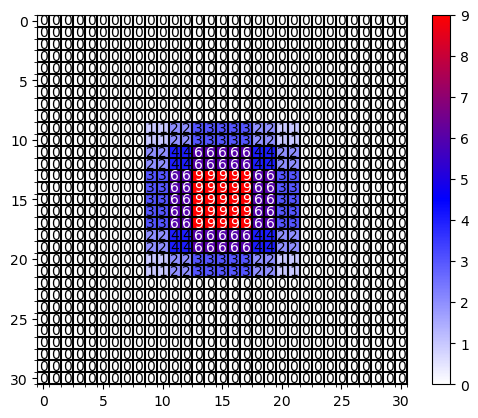

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


def dilated_conv_one_pixel(center: (int, int),
                           feature_map: np.ndarray,
                           k: int = 3,
                           r: int = 1,
                           v: int = 1):
    """
    膨胀卷积核中心在指定坐标center处时，统计哪些像素被利用到，
    并在利用到的像素位置处加上增量v
    Args:
        center: 膨胀卷积核中心的坐标
        feature_map: 记录每个像素使用次数的特征图
        k: 膨胀卷积核的kernel大小
        r: 膨胀卷积的dilation rate
        v: 使用次数增量
    """
    # assert divmod(3, 2)[1] == 1

    # left-top: (x, y)
    left_top = (center[0] - ((k - 1) // 2) * r, center[1] - ((k - 1) // 2) * r)
    print('r', r)
    for i in range(k):
        for j in range(k):
            feature_map[left_top[1] + i * r][left_top[0] + j * r] += v


def dilated_conv_all_map(dilated_map: np.ndarray,
                         k: int = 3,
                         r: int = 1):
    """
    根据输出特征矩阵中哪些像素被使用以及使用次数，
    配合膨胀卷积k和r计算输入特征矩阵哪些像素被使用以及使用次数
    Args:
        dilated_map: 记录输出特征矩阵中每个像素被使用次数的特征图
        k: 膨胀卷积核的kernel大小
        r: 膨胀卷积的dilation rate
    """
    new_map = np.zeros_like(dilated_map)
    for i in range(dilated_map.shape[0]):
        for j in range(dilated_map.shape[1]):
            if dilated_map[i][j] > 0:
                dilated_conv_one_pixel((j, i), new_map, k=k, r=r, v=dilated_map[i][j])

    return new_map


def plot_map(matrix: np.ndarray):
    plt.figure()

    c_list = ['white', 'blue', 'red']
    new_cmp = LinearSegmentedColormap.from_list('chaos', c_list)
    plt.imshow(matrix, cmap=new_cmp)

    ax = plt.gca() # 获取当前活动的坐标轴对象 
    ax.set_xticks(np.arange(-0.5, matrix.shape[1], 1), minor=True) # 用于设置 x 轴上的刻度位置。这个方法允许你自定义 x 轴上的哪些位置应该显示刻度标记。
    ax.set_yticks(np.arange(-0.5, matrix.shape[0], 1), minor=True)

    # 显示color bar
    plt.colorbar()

    # 在图中标注数量
    thresh = 5
    for x in range(matrix.shape[1]):
        for y in range(matrix.shape[0]):
            # 注意这里的matrix[y, x]不是matrix[x, y]
            info = int(matrix[y, x])
            ax.text(x, y, info,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color="white" if info > thresh else "black")
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1.5)
    plt.show()
    plt.close()

def main():
    # bottom to top
    dilated_rates = [1, 2, 3]
    # init feature map
    size = 31
    m = np.zeros(shape=(size, size), dtype=np.int32)
    center = size // 2
    m[center][center] = 1
    # print(m)
    # plot_map(m)

    for index, dilated_r in enumerate(dilated_rates[::-1]):
        new_map = dilated_conv_all_map(m, r=dilated_r)
        m = new_map
    print(m)
    plot_map(m)

if __name__ == '__main__':
    main()

<div style='color:orange; font-size:20px'>感受野</div>

<a href='#4'>▲ 膨胀卷积</a>

感受野指的是特征图上某个点所能看到的输入图像的区域大小，即特征图上的点是由输入图像中感受野大小区域的计算得到的。感受野的大小决定了神经元能够感知和响应的信息范围。对于一个卷积特征图而言，感受野中每个像素并不是同等重要的，越接近感受野中间的像素相对而言就越重要。

感受野大小的计算：

![2.png](2.png)

![3.png](3.png)

如果算上第二层卷积核每个神经元，总共可见感受野为 7 * 7.

#### gridding effect

